In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm
import requests_cache
import matplotlib.pyplot as plt


# Implementation of Black-Scholes formula in Python
# Define variables 
# r is the risk-free rate
# S is the current stock price
# K is the option strike price
# T is the time to maturity
# sigma is the volatility of the stock

def blackScholes(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            price = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            price = K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1, 0, 1)
        return price
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

def delta_calc(r, S, K, T, sigma, type="c"):
    "Calculate delta of an option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    try:
        if type == "c":
            delta_calc = norm.cdf(d1, 0, 1)
        elif type == "p":
            delta_calc = -norm.cdf(-d1, 0, 1)
        return delta_calc
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

def theta_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            theta_calc = -S*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) - r*K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            theta_calc = -S*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) + r*K*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
        return theta_calc/365
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

def calculate_prob_profit_bs(S, K, T, r, sigma, type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if type == 'c':
        prob_profit = norm.cdf(d2)
    else:  # for put option
        prob_profit = norm.cdf(-d2)
    
    return prob_profit

def get_option_data(stock_symbol='JPM', session=None):
    # Load data
    stock = yf.Ticker(stock_symbol, session=session)
    # Get stock option information
    all_call_data = []
    all_put_data = []
    option_dates = stock.options
    for date in option_dates:
        option_data = stock.option_chain(date)
        # print(type(option_data.calls))
        
        call_data = option_data.calls
        put_data = option_data.puts
        
        call_data['date'] = date
        put_data['date'] = date
        call_data['stock_symbol'] = stock_symbol
        put_data['stock_symbol'] = stock_symbol

        call_data['Option Income'] = call_data['lastPrice'] * 100
        call_data['Break Even'] = call_data['strike'] + call_data['lastPrice']
        # call_data['Total Income'] = call_data['Option Income'] + (call_data['strike'] * 100)

        put_data['Option Income'] = put_data['lastPrice'] * 100
        put_data['Break Even'] = put_data['strike'] - put_data['lastPrice']
        # put_data['Total Income'] = put_data['Option Income'] + (put_data['strike'] * 100)

        all_call_data.append(option_data.calls)
        all_put_data.append(option_data.puts)


    # print(all_call_data[0])

    return all_call_data, all_put_data


def get_stock_price_history(stock_symbol='JPM', session=None):
    # Load data
    stock = yf.Ticker(stock_symbol, session=session) 
    # Get stock price history
    stock_data = stock.history(period='3mo')
    return stock_data

In [9]:
sp500_data = yf.Ticker("SPY")
print(sp500_data.history(period='3mo'))

                                 Open        High         Low       Close  \
Date                                                                        
2024-05-30 00:00:00-04:00  522.833274  523.511080  519.653530  520.929382   
2024-05-31 00:00:00-04:00  521.906320  525.803720  516.693097  525.674133   
2024-06-03 00:00:00-04:00  527.318831  527.607876  520.919432  526.102722   
2024-06-04 00:00:00-04:00  524.767071  527.448423  523.271894  526.690857   
2024-06-05 00:00:00-04:00  529.063200  532.970578  527.029722  532.950623   
...                               ...         ...         ...         ...   
2024-08-23 00:00:00-04:00  559.530029  563.090027  557.289978  562.130005   
2024-08-26 00:00:00-04:00  563.179993  563.909973  559.049988  560.789978   
2024-08-27 00:00:00-04:00  559.489990  562.059998  558.320007  561.559998   
2024-08-28 00:00:00-04:00  561.210022  561.650024  555.039978  558.299988   
2024-08-29 00:00:00-04:00  560.309998  563.679993  557.179993  558.349976   

In [76]:
session = requests_cache.CachedSession('yfinance.cache')
session.headers['User-agent'] = 'my-program/1.0'

# Define stock symbols of interest
test_list = ['JPM', 'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NFLX', 'SPY', 'QQQ']
tickers = ['JPM', 'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NFLX', 'SPY', 'QQQ',
           'MMM', 'ABT', 'ABBV', 'MO', 'AAL', 'T', 'ADP', 'AZO', 'BAC', 'BBY', 'BA', 'C',
           'CAT', 'CVX', 'CSCO', 'KO', 'CL', 'COST', 'CVS', 'DAL', 'XOM', 'EFX',
           'ETSY', 'F', 'GM', 'GE', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ','KR',
           'LLY', 'LOW', 'LMT', 'MA', 'MCD'
           ]

results = []
for ticker in test_list:
    price_data = get_stock_price_history(ticker, session=session)
    options_call_data, options_put_data = get_option_data(ticker, session=session)
    price_data['Daily_Returns'] = (price_data['Close'] / price_data['Close'].shift(1)) - 1

    daily_std = price_data['Daily_Returns'].std()
    sigma = daily_std * np.sqrt(252)
    r = 0.0425
    s = price_data['Close'].iloc[-1]

    # print(options_put_data[3]['date'])
    for i in range(1, len(options_put_data)):
        # Need to deal with the date minus due to -1 answer when subtracting dates during overlaps (Close date = current date)
        t = (pd.to_datetime(options_put_data[i]['date'][0]) - pd.to_datetime('today')).days/365
        options_put_data[i]['BS Price'] = blackScholes(r=r, S=s, K = options_put_data[i]['strike'], T=t, sigma=sigma, type='p')
        options_put_data[i]['Delta'] = delta_calc(r=r, S=s, K = options_put_data[i]['strike'], T=t, sigma=sigma, type='p')
        options_put_data[i]['Theta'] = theta_calc(r=r, S=s, K = options_put_data[i]['strike'], T=t, sigma=sigma, type='p')
        options_put_data[i]['Prob Profit'] = calculate_prob_profit_bs(r=r, S=s, K = options_put_data[i]['strike'], T=t, sigma=sigma, type='p')
        options_put_data[i]['Expected Option-Income Return'] = (1 - options_put_data[i]['Prob Profit']) * options_put_data[i]['Option Income']

    # for i in range(1, len(options_call_data)):
    #     t = (pd.to_datetime(options_call_data[i]['date'][0]) - pd.to_datetime('today')).days/365
    #     options_call_data[i]['BS Price'] = blackScholes(r=r, S=s, K = options_call_data[i]['strike'], T=t, sigma=sigma, type='c')
    #     options_call_data[i]['Delta'] = delta_calc(r=r, S=s, K = options_call_data[i]['strike'], T=t, sigma=sigma, type='c')
    #     options_call_data[i]['Theta'] = theta_calc(r=r, S=s, K = options_call_data[i]['strike'], T=t, sigma=sigma, type='c')
    #     options_call_data[i]['Prob Profit'] = calculate_prob_profit_bs(r=r, S=s, K = options_call_data[i]['strike'], T=t, sigma=sigma, type='c')
    #     options_call_data[i]['Expected Option-Income Return'] = (1 - options_call_data[i]['Prob Profit']) * options_call_data[i]['Option Income']

    price = price_data.iloc[-1]['Close']
    filtered_data = options_put_data[6][(options_put_data[6]['strike'] < price)]

    # Calculate the days to expiration
    exp_day = (pd.to_datetime(filtered_data['date'].iloc[0]) - pd.to_datetime('today')).days

    # Calculate the SMA and Bollinger Bands
    sma = price_data['Close'].rolling(window=30).mean()
    std = price_data['Close'].rolling(window=30).std()
    upper_band = sma + (2 * std)
    lower_band = sma - (2 * std)

    answer_data = filtered_data[(filtered_data['strike'] < lower_band.iloc[-1])]
    max_row = answer_data.loc[answer_data['Expected Option-Income Return'].idxmax()]
    results.append(max_row)


In [77]:
df = pd.DataFrame(results)
df['Cost'] = df['strike'] * 100
df[['stock_symbol', 'lastPrice', 'Cost' ,'date', 'strike', 'BS Price', 'Option Income', 'Prob Profit', 'Expected Option-Income Return', 'Delta', 'Theta']]

,stock_symbol,lastPrice,Cost,date,strike,BS Price,Option Income,Prob Profit,Expected Option-Income Return,Delta,Theta
22,JPM,0.97,19500.0,2024-10-18,195.0,0.252760,97.0,0.042530,92.874592,-0.035977,-0.013192
35,AAPL,1.42,20500.0,2024-10-18,205.0,1.107935,142.0,0.118584,125.161064,-0.100380,-0.038170
34,MSFT,4.47,39000.0,2024-10-18,390.0,2.868677,447.0,0.195175,359.756808,-0.176281,-0.069918
20,GOOGL,1.85,15000.0,2024-10-18,150.0,1.329368,185.0,0.190774,149.706885,-0.167679,-0.034022
15,AMZN,2.25,16000.0,2024-10-18,160.0,2.686707,225.0,0.261262,166.216072,-0.225902,-0.056034
32,TSLA,6.90,18500.0,2024-10-18,185.0,8.469452,690.0,0.345136,451.855858,-0.266749,-0.150921
56,NFLX,5.89,58500.0,2024-10-18,585.0,0.241408,589.0,0.015170,580.064709,-0.012396,-0.017284
0,SPY,0.12,51000.0,2024-09-10,510.0,0.000164,12.0,0.000058,11.999298,-0.000053,-0.000141
0,QQQ,0.31,43000.0,2024-09-10,430.0,0.024167,31.0,0.005079,30.842559,-0.004583,-0.010880


In [ ]:
df['Cost'] = df['lastPrice'] * 100

### The Graph part

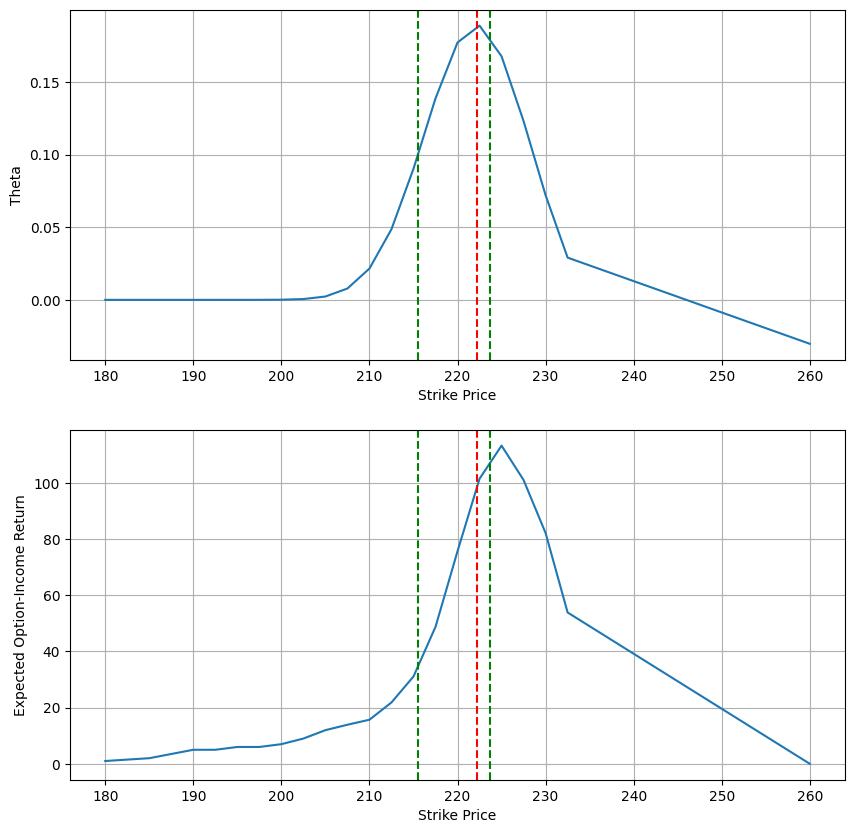

In [6]:
lower_bound = price_data.iloc[-1]['Close'] * 0.8
upper_bound = price_data.iloc[-1]['Close'] * 1.2


# Plot only the options that are within the range of 20% of the current stock price
filtered_data = options_put_data[1][(options_put_data[1]['strike'] > lower_bound) & (options_put_data[1]['strike'] < upper_bound)]

# Calculate the days to expiration
exp_day = (pd.to_datetime(filtered_data['date'].iloc[0]) - pd.to_datetime('today')).days

# Calculate the SMA and Bollinger Bands
sma = price_data['Close'].rolling(window=exp_day).mean()
std = price_data['Close'].rolling(window=exp_day).std()
upper_band = sma + (2 * std)
lower_band = sma - (2 * std)

# print(upper_band)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(filtered_data['strike'], (filtered_data['Theta']* -1))
# Vertical line for current stock price and bollinger bands
plt.axvline(upper_band.iloc[-1], color='g', linestyle='--')
plt.axvline(lower_band.iloc[-1], color='g', linestyle='--')
plt.axvline(price_data.iloc[-1]['Close'], color='r', linestyle='--')
plt.xlabel('Strike Price')
plt.ylabel('Theta')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(filtered_data['strike'], filtered_data['Expected Option-Income Return'])
# Vertical line for current stock price and bollinger bands
plt.axvline(upper_band.iloc[-1], color='g', linestyle='--')
plt.axvline(lower_band.iloc[-1], color='g', linestyle='--')
plt.axvline(price_data.iloc[-1]['Close'], color='r', linestyle='--')
plt.xlabel('Strike Price')
plt.ylabel('Expected Option-Income Return')
plt.grid()
plt.show()